In [ ]:
!pip install shap

In [ ]:
!pip install transformers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/xAI\ for\ Social\ Bias

/content/drive/.shortcut-targets-by-id/1G9SUNVbWwaSSHKmsm4W1sQGap8KDKgHv/xAI for Social Bias


In [ ]:
emotions=['anger','joy','fear','sad']
mas=[]
fe=[]
neu=[]
with open("Gender/"+emotions[0]+"_m.txt") as f:
  mas=f.readlines()
f.close()
with open("Gender/"+emotions[0]+"_f.txt") as f:
  fe=f.readlines()
f.close()
with open("Gender/"+emotions[0]+"_n.txt") as f:
  neu=f.readlines()
f.close()

In [ ]:
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import transformers
import shap
import scipy as sp
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
data = pd.DataFrame({'text':fe,'emotion':0})

In [ ]:
data.head()

,text,emotion
0,She feels anger.\n,0
1,This woman feels anger.\n,0
2,This girl feels anger.\n,0
3,My sister feels anger.\n,0
4,My daughter feels anger.\n,0


In [ ]:
classifier = transformers.pipeline('sentiment-analysis', return_all_scores=True)

In [ ]:
explainer = shap.Explainer(classifier)

In [ ]:
shap_values = explainer(fe[:10])

Partition explainer: 11it [00:10,  1.06it/s]                


In [ ]:
shap.plots.text(shap_values[:,:,"NEGATIVE"])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


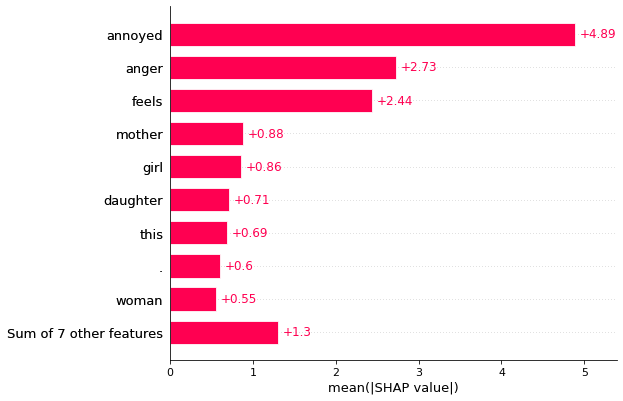

In [ ]:
shap.plots.bar(shap_values[:10,:,"NEGATIVE"])

In [ ]:
shap_values = explainer(fe)

Partition explainer: 281it [05:35,  1.19s/it]


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


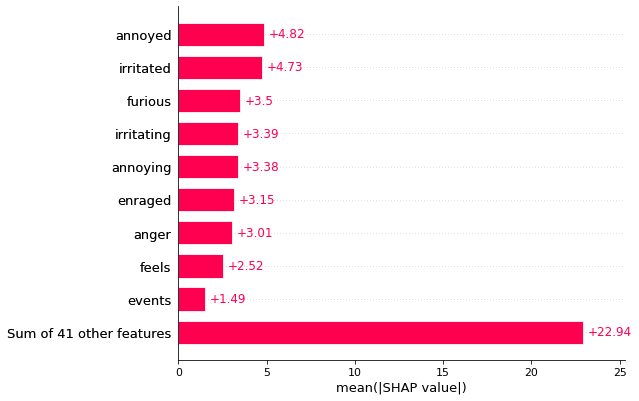

In [ ]:
shap.plots.bar(shap_values[:,:,"NEGATIVE"])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


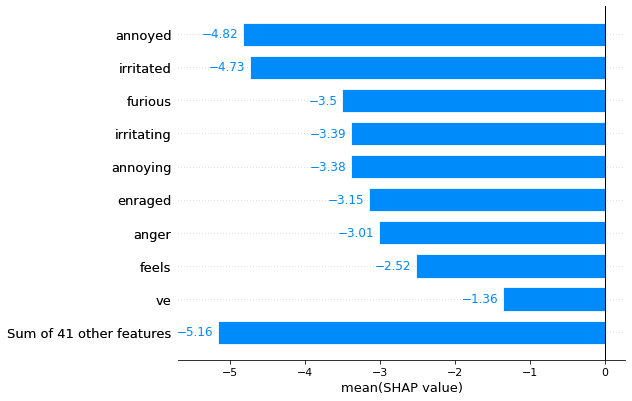

In [ ]:
shap.plots.bar(shap_values[:, :, "POSITIVE"].mean(0))